<a href="https://colab.research.google.com/github/asawariP/MachineLearning_With_Python/blob/main/2_1_Basic_SVR_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 2.0264876 , -0.05027593],
       [ 1.52728421, -1.81506567],
       [ 0.64763756, -2.71875247],
       ...,
       [ 0.82484148, -0.44063229],
       [-0.23194606,  0.92159961],
       [-0.72376732,  1.40774683]])

In [5]:
y

array([ 1.77720209e+02, -2.97590461e+00, -1.43442676e+02, -8.73833879e+01,
        1.11989076e+02,  2.47643486e+01,  1.26409466e+02,  1.07728944e+02,
        8.75651448e+01,  1.04762210e+02, -2.36538404e+01, -1.11934175e+01,
       -2.87743659e+02, -2.23289723e+01,  8.95381585e+01,  4.51423515e+01,
       -2.35088470e+02,  9.04758782e+01, -5.98573045e+01,  5.38265583e+01,
        5.41749244e+01, -1.58177893e+02, -8.74830155e+01,  2.20765398e+01,
        4.55665118e+01,  5.38274081e+01,  1.04007319e+02, -9.61223001e+01,
        3.29490398e+01, -1.00199761e+02, -7.41034414e+01,  8.19810287e+01,
       -1.76651916e+02,  2.96650245e+01, -2.22578599e+01,  6.89869845e+01,
       -5.58519974e+01, -1.60801099e+02, -2.37872144e+02, -9.70294547e+01,
        7.33050952e+01,  1.48038250e+02,  1.08904777e+01, -1.35217832e+02,
       -5.65989432e+01,  1.20752041e+02, -8.64209009e+01, -1.06405236e+02,
       -5.89435902e+01, -1.36957030e+02, -1.68841795e+02,  2.01658711e+02,
        4.38019381e+01,  

In [6]:
pd.DataFrame(X)[0]

0      2.026488
1      1.527284
2      0.647638
3     -0.613064
4      0.195085
         ...   
995   -0.785582
996    0.770450
997    0.824841
998   -0.231946
999   -0.723767
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

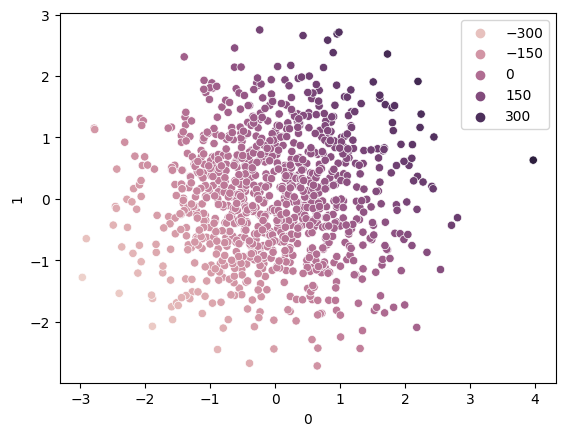

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[87.55739519, 74.80181683]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([ -20.49768688,   33.64635742, -137.19575567,   24.99529145,
       -177.20641384,  -69.08508856, -202.36777681,  -98.47386753,
        -11.49958643, -124.30221572, -113.21605314,   28.12964142,
        -72.47999062,  183.4114946 ,  -47.6842342 , -133.9325899 ,
        116.90458363,   50.1851172 ,  158.47681532, -121.94309964,
        274.24897824,   22.994212  ,  125.91918254, -129.76019295,
        -40.77768914, -233.88672925,   73.08174721,  -32.80646056,
       -114.29267938,  -49.54930058,   54.72741333, -113.74053336,
       -108.31152931,  -77.80210907, -149.57375129,  -36.16827975,
       -260.63614567,  176.01563426,   -5.7567948 ,  -35.05739526,
        219.09100683,  184.73775432,  -43.29194217,  104.19575795,
         42.04053435,   23.74417077, -136.15251701,   57.80594897,
       -172.47888686,  231.77698613,  -92.49145941,  105.3664318 ,
          4.61060367,   88.7640525 ,   41.288114  ,  217.6521161 ,
         -1.82599333,  -66.80170774,   14.99435216,  -87.32849

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9991570159520863


## Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.652 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.666 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.637 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.652 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.666 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.637 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9992065724156873
